In [224]:
from Classes.KNumNeighborsClassifier import KNumNeighborsClassifier
from Classes.KNumNeighborsTeacher import KNumNeighborsTeacher
from Functions.functions_of_priority import max_count_class
import numpy as np
import pandas as pd
from random import choice
from Functions.distance_functions import euclid_distance
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [ ]:
class KMeanClastinatorTeacher:
    def __init__(self, centers_of_mass: iter, k_neighbors: int, metric: callable, mass_center_searcher: callable, classifier: ) -> None:
        self.metric = metric
        self.num_of_clasters = num_of_clasters
        self.k_neighbors = k_neighbors
        self.mass_center_searcher = mass_center_searcher
        self.centers_of_mass = centers_of_mass


In [225]:
class KMeanClastinatorPredicter:
    def __init__(self, num_of_clasters: int, k_neighbors: int, metric: callable, mass_center_searcher: callable, centers_of_mass_initiator: callable) -> None:
        self.metric = metric
        self.num_of_clasters = num_of_clasters
        self.k_neighbors = k_neighbors
        self.mass_center_searcher = mass_center_searcher
        self.centers_of_mass_initiator = centers_of_mass_initiator
        self.centers_of_mass = centers_of_mass

    def clastering(self, X):
        self.centers_of_mass = self.centers_of_mass_initiator(X, self.metric, self.num_of_clasters)
        # print('c:', self.centers_of_mass)
        for _ in range(3):
            x = []
            y = np.array([])
            train_x = np.array(X, copy=True)
            # print(train_x.shape)
            for i in range(self.centers_of_mass.shape[0]):
                obj_indexis = np.argsort(self.metric(train_x, self.centers_of_mass[i]))
                # print(train_x[obj_indexis][0:self.k_neighbors])
                x += train_x[obj_indexis][0:self.k_neighbors].tolist()
                y = np.append(y, [i]*self.k_neighbors)
                train_x = train_x[obj_indexis][self.k_neighbors:]

            classifier = KNumNeighborsClassifier(k=self.k_neighbors, distance=self.metric, function_of_priority=max_count_class)
            classifier.X_train = np.array(x)
            classifier.y_train = y
            # print(x)
            # print(y)
            clastered_x = classifier.predict(X)
            for c in range(self.num_of_clasters):
                self.centers_of_mass[c] = self.mass_center_searcher(X[clastered_x == c])
            # print(self.centers_of_mass)
        return X, clastered_x
        


In [226]:
data1 = pd.read_csv('../Data/DataLaba6/data1.csv')
x1 = (data1.drop('class', axis=1)).to_numpy()
y1 = data1['class'].to_numpy()


In [227]:
cl = KMeanClasterer(3, 10, euclid_distance, lambda a: sum(a)/a.shape[0], 
                    lambda x, metric, k: np.array([choice(x) for _ in range(k)])
                    )
obj, res = cl.clastering(x1)


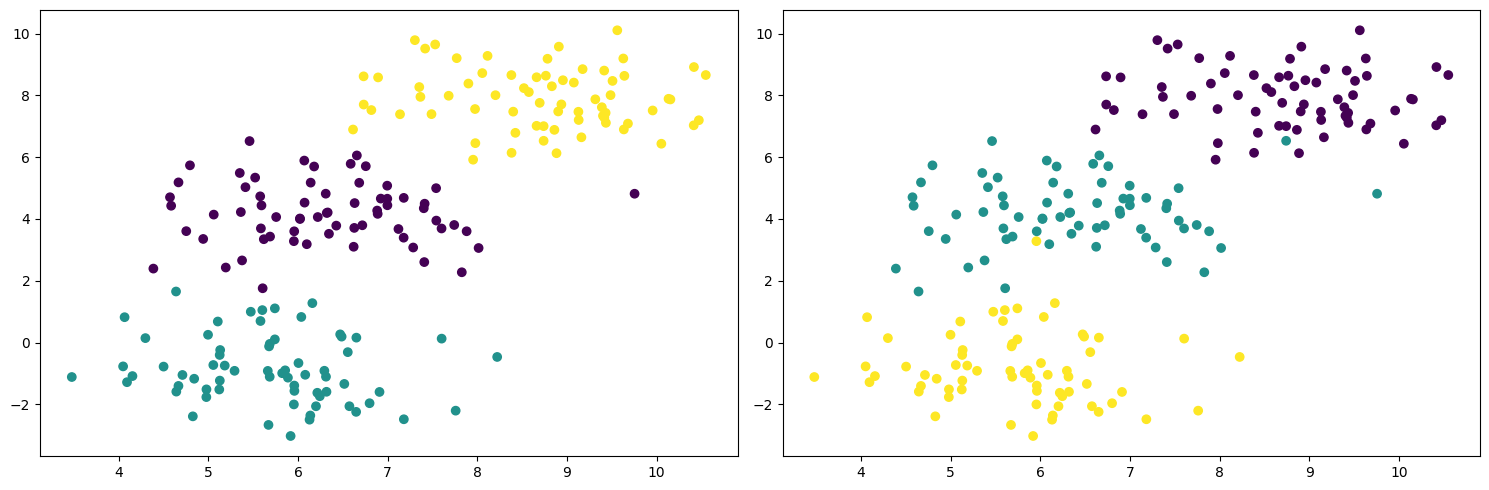

In [228]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(obj[:,0], obj[:,1], c=res)
ax = fig.add_subplot(gs[0, 1])
ax.scatter(x1[:,0], x1[:,1], c=y1)